# **Online Retail Analysis - Capstone Project**

# Extract, Transform and Load (ETL) and Exploratory Data Analysis

ETL is a data integration process used to prepare data for analysis, reporting, and decision making. Using ETL will improve data quality, consistency, and accessibility.

EDA is the process of analysing and summarising a dataset before applying any formal modeling or hypothesis testing. It helps to understand the main characteristics of the data such as uncover patterns, spot anomalies, check assumptions, and generate hypotheses.

## Objectives 

- Extract the data from the source (Kaggle).
- Transform the data into a clean, consistent and usable dataset.
- Load the transformed dataset ready to be used for analysis.
- Statistical summary
- Probability 

# Online Retail Dataset

## Inputs

Online Retail Dataset can be found [HERE]( https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset)

The online retail dataset contains transactional data of 13 months, including product details, quantities, prices, purchase timestamps, customer IDs, and country information. It can be used to analyse customer behaviour, identify popular products, and support pricing and marketing strategies. It's suitable for data analysis and machine learning. 

Column Descriptors:

- StockCode: A code used to identify the product that was purchased
- Description: A brief description of the product that was purchased
- Quantity: The quantity of the product that was purchased
- InvoiceDate: The date and time that the purchase was made
- UnitPrice: The price of one unit of the product that was purchased
- CustomerID: The unique identifier for the customer who made the purchase
- Country: The country where the customer who made the purchase is located

## Outputs

- Clean dataset stored in the processed_data folder, ready to be used for analysis.
- Statistical summary
- Probability test


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project'

# **Ethical, Legal and Social Implications of Data Handling**


**Ethical Implications:**
Online retail businesses must handle customer data responsibly by protecting privacy, ensuring transparency, and avoiding bias. Informed consent and clear communication about data usage are essential to maintain trust and accountability.

**Legal Implications:**
Data practices must comply with regulations like GDPR and CCPA, requiring consent, secure storage, and user access to data. Non-compliance can lead to legal penalties and damage to reputation, making legal adherence vital for data governance.

**Social Implications:**
Data use can impact society through issues like digital exclusion, loss of consumer autonomy, and reduced trust. Over targeting or favoring high value customers may create inequality, while automation can affect jobs, highlighting the need for ethical tech use.

# Load Raw Dataset

Import libraries.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_1samp
sns.set_style('whitegrid')

Load raw dataset.

In [46]:
import pandas as pd

df = pd.read_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\raw_data\\Online_Retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# Cleaning Process

Identifying duplicate data.

In [10]:
df.duplicated().sum() #check for duplicates

5268

We can see above 5268 duplicates exist in the dataset. I am going to remove these from the dataset. This will improve data quality, accuracy and reliability. 

In [11]:
processed_data = df.drop_duplicates() #remove duplicates from the dataset

processed_data.head() #display dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Convert datatypes in to appropriate types.

In [18]:
processed_data = processed_data.copy() #create a copy of the dataset

#change datatypes
processed_data['Description'] = processed_data['Description'].astype('string') 
processed_data['InvoiceNo'] = processed_data['InvoiceNo'].astype('string')
processed_data['StockCode'] = processed_data['StockCode'].astype('string')
processed_data['InvoiceDate']= pd.to_datetime(processed_data['InvoiceDate']) #convert to datetime for time series analysis
processed_data['CustomerID'] = processed_data['CustomerID'].astype('string')
processed_data['Country'] = processed_data['Country'].astype('string')

#print the data types to verify changes
processed_data.dtypes

InvoiceNo                  string[python]
StockCode                  string[python]
Description                string[python]
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                 string[python]
Country                    string[python]
Total_Transaction_Value           float64
dtype: object

Identifying missing values.

Displayed below is an overview of the dataset displaying the size of the dataset, list of columns, if and how many missing values within the dataset.

In [13]:
df_info = {
    "Shape": processed_data.shape, #size of dataset
    "Columns": processed_data.columns.tolist(), #list of column names
    "Missing Values": processed_data.isnull().sum().to_dict(), #identify missing values in each column
    "Sample Data": processed_data.head(8).to_dict() #sample data of 8 rows
}

df_info

{'Shape': (536641, 8),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 1454,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365',
   5: '536365',
   6: '536365',
   7: '536366'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E',
   5: '22752',
   6: '21730',
   7: '22633'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.',
   5: 'SET 7 BABUSHKA NESTING BOXES',
   6: 'GLASS STAR FROSTED T-LIGHT HOLDER',
   7: 'HAND WARMER UNION JACK'},
  'Quantity': {0: 6, 1: 6, 2: 8, 3: 6, 4: 6, 5: 2, 6:

Above we can see that the description column contains missing values. I will remove these from the dataset.

In [14]:
processed_data = processed_data.dropna(subset=['Description']) #drop rows with missing values indescription column

processed_data.isnull().sum() #missing values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Add new column "total transaction value" to the dataset to get the overall spend.

In [47]:
processed_data['Total_Transaction_Value'] = processed_data['Quantity'] * processed_data['UnitPrice'] #add new column total transaction value
processed_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


When initially looking at the dataset in Microsoft Excel, i noticed values within the description column which are not product descriptions but hold no unit price or have negative quantity. for example: check, ?, Manual, faulty, POSTAGE and some others. I have identified a pattern with these types of descriptions, which seems to be lowercase characters or special characters. There seems to be a large existance of them, therefore i will remove these from the dataset by identifying product descriptions which contain lowercase of special characters.

In [19]:
processed_data.info() #summary of data

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                535187 non-null  string        
 1   StockCode                535187 non-null  string        
 2   Description              535187 non-null  string        
 3   Quantity                 535187 non-null  int64         
 4   InvoiceDate              535187 non-null  datetime64[ns]
 5   UnitPrice                535187 non-null  float64       
 6   CustomerID               535187 non-null  string        
 7   Country                  535187 non-null  string        
 8   Total_Transaction_Value  535187 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(5)
memory usage: 40.8 MB


Identify and remove descriptions which contain special characters such as "?".

In [20]:
#remove rows with '?' in the description column
processed_data = processed_data[~processed_data['Description'].str.contains(r'\?', na=False)]

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535105 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                535105 non-null  string        
 1   StockCode                535105 non-null  string        
 2   Description              535105 non-null  string        
 3   Quantity                 535105 non-null  int64         
 4   InvoiceDate              535105 non-null  datetime64[ns]
 5   UnitPrice                535105 non-null  float64       
 6   CustomerID               535105 non-null  string        
 7   Country                  535105 non-null  string        
 8   Total_Transaction_Value  535105 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(5)
memory usage: 40.8 MB



Identify and remove descriptions which contain lowercase chracaters.

In [ ]:
#remove rows with lowercase letters in the description column
processed_data = processed_data[~processed_data['Description'].str.contains(r'[a-z]', na=False)]

processed_data.info()

Descriptive statistics. This summary shows the total sales, average transaction value, number of unique customers, popular products being sold and popular countries.

In [21]:
total_sales = processed_data['Total_Transaction_Value'].sum() #sum of sales

average_transaction_value = processed_data['Total_Transaction_Value'].mean() #average trasnaction value

no_unique_customers = processed_data['CustomerID'].nunique() #unique customers

popular_products = processed_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8) #popular products

popular_country = processed_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5) #popular countries

#display statistic summary
stats_summary = {
    "Total Sales": total_sales,
    "Average Transaction Value": average_transaction_value,
    "Number of Unique Customers": no_unique_customers,
    "Top 8 Products" : popular_products.to_dict(),
    "Top 5 Countries" : popular_country.to_dict()

}
stats_summary

{'Total Sales': 9726006.953999998,
 'Average Transaction Value': 18.175885020696867,
 'Number of Unique Customers': 4372,
 'Top 8 Products': {'WORLD WAR 2 GLIDERS ASSTD DESIGNS': 53751,
  'JUMBO BAG RED RETROSPOT': 47260,
  'POPCORN HOLDER': 36322,
  'ASSORTED COLOUR BIRD ORNAMENT': 36282,
  'PACK OF 72 RETROSPOT CAKE CASES': 36016,
  'WHITE HANGING HEART T-LIGHT HOLDER': 35298,
  'RABBIT NIGHT LIGHT': 30631,
  'MINI PAINT SET VINTAGE ': 26437},
 'Top 5 Countries': {'United Kingdom': 4279101,
  'Netherlands': 200128,
  'EIRE': 142495,
  'Germany': 117341,
  'France': 110438}}

# Save and Load Processed Dataset

In [ ]:
#save processed data and store in processed_data folder

processed_data.to_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\processed_data\\Processed_Online_Retail.csv", index=False) 

In [31]:
#load processed data and display

load_data = pd.read_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\processed_data\\Processed_Online_Retail.csv") 

load_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
535100,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
535101,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
535102,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
535103,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


# **Statistical Summary and Probability Test**

Statistics, probability, and data analysis are key to data cleaning as they help detect errors, handle missing values, prevent bias, and ensure data integrity leading to more accurate and reliable insights.

**Statistical Summary**

A statistical summary is shown in data analytics to provide a concise overview of the key characteristics of a dataset. This includes metrics such as the mean, median, standard deviation, minimum, maximum, and quartiles. The main reasons for presenting a statistical summary are:

- Understand data distribution: quickly identifies how the data is spread and whether it's skewed or normally distributed.

- Identify outliers and anomalies: highlights unusual values that may need further investigation or cleaning.

- Assess central tendency and variability: shows the average behaviour of the data and how much it varies, which is crucial for decision making.

- Support data driven decisions: stakeholders can make more informed choices when they understand the overall patterns and trends within the data.

- Guide further analysis: initial insights from statistical summaries help determine appropriate analytical techniques, such as hypothesis testing or predictive modeling.

In essence, a statistical summary acts as a foundational step in the analytics process, offering clarity and direction for more in depth analysis.

In [48]:
#load dataset
df = pd.read_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\processed_data\\Processed_Online_Retail.csv") 

summary = df['Total_Transaction_Value'].describe() #statistical summary of total transaction value
print(summary) #display summary

count    535105.000000
mean         18.175885
std         381.200963
min     -168469.600000
25%           3.750000
50%           9.900000
75%          17.400000
max      168469.600000
Name: Total_Transaction_Value, dtype: float64


The mean is commonly used in data analytics because it provides a simple yet powerful measure of central tendency, offering insight into the typical value within a dataset. The main reasons for using the mean in data analytics are; summarise data, useful for comparisons, supports decision making, foundation for statistical models and easy to calculate and understand. As we can see above the average transaction value is £18.18

Using a T-test helps statistically validate whether the observed difference (£18.18) in average transaction value is meaningful, rather than relying on assumptions or visual interpretation alone. It ensures data driven decisions backed by evidence.

T Test will be used to see if the observed average transaction value (£18.18) just a result of random variation or is it truly lower than £20.

In [58]:
transaction_values = processed_data['Total_Transaction_Value'] #data for t-test

t_stat, p_value = ttest_1samp(transaction_values, popmean=20) #test if average transaction value is significantly different from 20

print(f"T-statistic: {t_stat:.4f}") #display t-statistic
print(f"P-value: {p_value:.4f}") #display p-value

T-statistic: -3.5004
P-value: 0.0005


- P-value = 0.0005 < 0.05

There is a significant difference between the average transaction value and the test value (£20).

- T-statistic is negative (-3.5)

This means the actual average is lower than the set value.

**Key Insights:**

- Most transaction values are clustered around the mean.

- The test value (£20) is slightly higher than the mean.

- The distribution appears to be roughly symmetric, suggesting that the data may be normally distributed.

**Conclusion:**

There is strong evidence that the average transaction value is significantly lower than 20. This could imply that customers are spending less per transaction than expected.

**Probability Test**

A probability test is essential in data analytics as it lends statistical validity to insights. By quantifying the likelihood that observed patterns occurred by chance, it enables businesses to make informed, evidence based decisions rather than relying on intuition.

Test - What is the probability that a randomly selected transaction is from the United Kingdom?

In [60]:
#total number of transactions
total_transactions = len(df) 

#number of UK transactions
uk_transactions = len(df[df['Country'] == 'United Kingdom'])

#calculate probability
prob_uk = uk_transactions / total_transactions 

print(f"Probability of a transaction being from the UK: {prob_uk:.2%}") #display probability 

Probability of a transaction being from the UK: 91.34%


The probability of a transaction being from the UK is 91.34%, indicating that the vast majority of purchases in the dataset originate from UK customers. This highlights the UK as the primary market for the business.

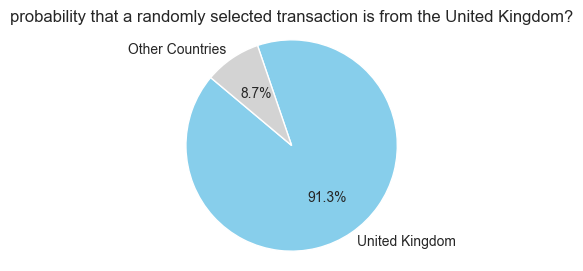

In [51]:
#calculate number of Non-UK transactions
non_uk_transactions = total_transactions - uk_transactions

#data for chart
labels = ['United Kingdom', 'Other Countries'] 
values = [uk_transactions, non_uk_transactions]
colors = ['skyblue', 'lightgray']

plt.figure(figsize=(3, 3)) #plot size
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140) #pie chart
plt.title('probability that a randomly selected transaction is from the United Kingdom?') #title
plt.axis('equal')  #ensure pie is a circle
plt.show() #display plot